# Assignment 2
## Names: Anant Bamba SN : 301430478, Harmeet Singh Bhullar SN: 301541206


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
df = pd.read_csv('./A2/Airline_review.csv', encoding = 'utf-8', usecols = ["Airline Name","Review_Title","Review","Verified"])

In [12]:
df.head()

,Airline Name,Review_Title,Verified,Review
0,AB Aviation,"""pretty decent airline""",True,Moroni to Moheli. Turned out to be a pretty ...
1,AB Aviation,"""Not a good airline""",True,Moroni to Anjouan. It is a very small airline...
2,AB Aviation,"""flight was fortunately short""",True,Anjouan to Dzaoudzi. A very small airline an...
3,Adria Airways,"""I will never fly again with Adria""",False,Please do a favor yourself and do not fly wi...
4,Adria Airways,"""it ruined our last days of holidays""",True,Do not book a flight with this airline! My fr...


In [13]:
df= df[df["Verified"]==True]
Adria_df=df[df["Airline Name"]=="Adria Airways"]
Lufthansa_df=df[df["Airline Name"]=="Lufthansa"] 
Turkish_df=df[df["Airline Name"]=="Turkish Airlines"]

In [14]:
Turkish_df.drop("Verified",axis = 1).head()



,Airline Name,Review_Title,Review
21158,Turkish Airlines,"""dismal to be exact""","The ticketing and flight experiences, both, w..."
21159,Turkish Airlines,"""I will miss my connection""",Last time that I will fly with Turkish Airli...
21161,Turkish Airlines,"""flights could have been better""",Extra legroom not possible for over 65. We bo...
21162,Turkish Airlines,"""My worst ever experience""",My worst ever experience. I travelled with b...
21163,Turkish Airlines,"""Application not working""",Flight from Beijing to Istanbul. Application ...


In [15]:
Lufthansa_df.drop("Verified",axis = 1).head()

,Airline Name,Review_Title,Review
14078,Lufthansa,"""The customer service was bad""",London to Berlin via Munich. The day before ...
14079,Lufthansa,"""Truly excellent experience""",Truly excellent experience with Lufthansa. F...
14080,Lufthansa,"""there was a massive baggage delay""",Flight was delayed by about 60+ mins on the ...
14081,Lufthansa,"""always an unpleasant experience""",This is becoming a rule when I fly with Lufth...
14085,Lufthansa,"""Second time I’ve had problems""",For reasons of bad weather we were redirecte...


In [16]:
Adria_df.drop("Verified",axis = 1).head()

,Airline Name,Review_Title,Review
4,Adria Airways,"""it ruined our last days of holidays""",Do not book a flight with this airline! My fr...
5,Adria Airways,"""Had very bad experience""",Had very bad experience with rerouted and ca...
8,Adria Airways,"""combined two flights""",Worst Airline ever! They combined two flight...
9,Adria Airways,"""the crew was nice""",Ljubljana to Munich. The homebase airport of ...
11,Adria Airways,"""bad customer service""",Vienna to Sofia. The flight was delayed by 2...


In [18]:
Adria_rev = Adria_df['Review'].dropna()

In [19]:
Adria_rev

4      Do not book a flight with this airline! My fr...
5       Had very bad experience with rerouted and ca...
8       Worst Airline ever! They combined two flight...
9      Ljubljana to Munich. The homebase airport of ...
11      Vienna to Sofia. The flight was delayed by 2...
12      We were traveling from Paris to Skopje on Ma...
13      Ljubljana to Munich. Adria's checkin system ...
14      A very unpleasant experience for my family. ...
15      Frankfurt to Ljubljana. Flight was very comf...
16      Ljubljana to Frankfurt. Flight delayed for m...
17      Ljubljana to Vienna. Overall, the flight ser...
18     Two nice short flights from Ljubljana to Sara...
Name: Review, dtype: object

In [25]:
Adria_rev_string = ', '.join(Adria_rev.astype(str))

In [26]:
def clean_text(text):
    words = word_tokenize(text.lower())
    cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(cleaned_words)

In [27]:
Adria_clean = clean_text(Adria_rev_string)

In [28]:
Adria_clean

'book flight airline friend returned sofia amsterdam september days sent us sms informing flight cancelled straight days tried reach airline web agent get solution finally hours cancelled flight time minutes call waiting airline able get us flight lufthansa book adria airways unreliable case ruined last days holidays since needed phones bad experience rerouted cancelled flights last weekend adria airways original route ljubljana sarajevo return two weeks received email flight cancelled offered route change ljubljana sarajevo via munich flight back changed accepted first flight via munich two hours return flight got email flight cancelled rebook via hotline accept flight croatian zagreb reached ljubljana h later organize transport zagreb ljubljana cost book flights adria airways heard financial situation worst airline ever combined two flights save costs instead flying pristina ljubliana zürich fly pristina ljubliana münchen zürich arrive later ljubljana munich homebase airport adria ai

In [29]:
def clean_text_freq(text):
    words = word_tokenize(text.lower())
    cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]
    freq_dist = FreqDist(cleaned_words)
    return freq_dist

In [30]:
Adria_dict = clean_text_freq(Adria_clean)

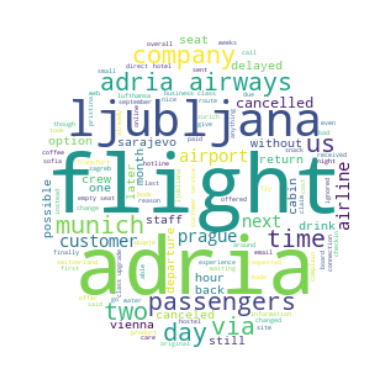

In [32]:
# options
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# this actually generates the word cloud
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(Adria_clean)

# and this displays it
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [33]:
# create an instance of the analyzer
analyzer = SentimentIntensityAnalyzer()

In [34]:
#Creating functions 
def get_sentiment_scores(text):
    """
    Uses VADER within NLTK to calculate sentiment
    
    Args:
        text (str): a string containing the file or text
        
    Returns: 
        dict: a dictionary that VADER creates
    """
    
    score = analyzer.polarity_scores(text)
    return score



In [35]:
review = df["Review"]
reviewanalyser=review.apply(get_sentiment_scores)



In [36]:
reviewanalyser.values

array([{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.9192},
       {'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'compound': -0.9242},
       {'neg': 0.031, 'neu': 0.849, 'pos': 0.121, 'compound': 0.7569},
       ..., {'neg': 0.041, 'neu': 0.959, 'pos': 0.0, 'compound': -0.6917},
       {'neg': 0.062, 'neu': 0.859, 'pos': 0.08, 'compound': 0.9588},
       {'neg': 0.235, 'neu': 0.731, 'pos': 0.034, 'compound': -0.886}],
      dtype=object)

In [37]:
reviewanalyser2=pd.DataFrame.from_dict(reviewanalyser)

In [38]:
reviewanalyser2.head()

,Review
0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
1,"{'neg': 0.114, 'neu': 0.878, 'pos': 0.008, 'co..."
2,"{'neg': 0.031, 'neu': 0.849, 'pos': 0.121, 'co..."
4,"{'neg': 0.079, 'neu': 0.846, 'pos': 0.074, 'co..."
5,"{'neg': 0.106, 'neu': 0.811, 'pos': 0.083, 'co..."


In [39]:
Lufthansa_rev = Lufthansa_df['Review'].dropna()

In [40]:
Lufthansa_rev

14078      London to Berlin via Munich. The day before ...
14079      Truly excellent experience with Lufthansa. F...
14080      Flight was delayed by about 60+ mins on the ...
14081     This is becoming a rule when I fly with Lufth...
14085      For reasons of bad weather we were redirecte...
                               ...                        
14171      Customer service is rude because they know t...
14172      Legroom in Economy was below minimum. With t...
14173      Definitely not a big fan of Lufthansa but th...
14174      Business class seating is well below industr...
14175      FRA-MXP and LIN-FRA in December. Two unevent...
Name: Review, Length: 71, dtype: object

In [41]:
Lufthansa_rev_string = ', '.join(Lufthansa_rev.astype(str))

In [43]:
Lufthansa_clean = clean_text(Lufthansa_rev_string)

In [44]:
Lufthansa_clean

'london berlin via munich day scheduled flight london munich cancelled lufthansa shows app get refund straight away offered different flight call customer service given explanation flight cancelled customer service bad could hear despite fact asked several times speak original flight offered late flights options given via brussels zurich frankfurt one ca remember chose zurich one one earliest one almost operated swiss upon arriving heathrow everything seemed order one hour waiting flight got message flight delayed immediately went lufthansa desk check wo miss zurich berlin flight told worry late zurich deal problem hours later took heathrow landing advised swiss crew gates go connecting flights reaching gate saw screen boarding moments later announced flight cancelled passengers go transit desk arrived massive queue whilst waiting queue called lufthansa unable hear even though asked speak told help given already airport lufthansa opinion connecting flights called lufthansa received mes

In [45]:
Lufthansa_dict = clean_text_freq(Lufthansa_clean)

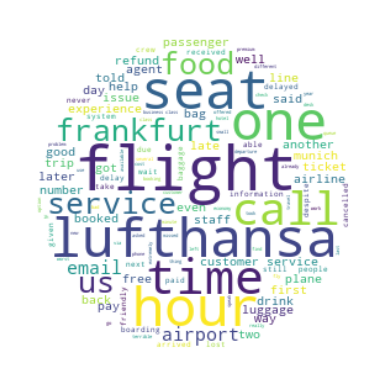

In [49]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# this actually generates the word cloud
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(Lufthansa_clean)

# and this displays it
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

Sentiment Analysis

In [50]:
Turkish_rev = Turkish_df['Review'].dropna()

In [51]:
Turkish_rev

21158     The ticketing and flight experiences, both, w...
21159      Last time that I will fly with Turkish Airli...
21161     Extra legroom not possible for over 65. We bo...
21162      My worst ever experience. I travelled with b...
21163     Flight from Beijing to Istanbul. Application ...
                               ...                        
21251      Terrible experience. Started with a very poo...
21252      The customer service is terrible, they commu...
21254      It was the worst experience that I ever had....
21255      Because of covid and the fare I paid, my exp...
21256      Took TK from Manila to Ankara via Istanbul i...
Name: Review, Length: 76, dtype: object

In [52]:
Turkish_rev_string = ', '.join(Turkish_rev.astype(str))

In [53]:
Turkish_clean = clean_text(Turkish_rev_string)

In [54]:
Turkish_clean

'ticketing flight experiences unimpressive dismal exact booked flight family adults children atl del via ist back del atl via ist flights made sure complete seat selection online days flight paid desired amounts times turkish airlines disregarded paid selections decided change seats within hours flight departure meaning chance change online atl del spend extra time counter family sit together turkish decided assign us different seats different rows airplane food service well disappointing going atl del opted asian vegetarian meals hindu vegetarian meals given boiled spinach white rice boiled corn return flight del atl made food selection given bad experience flight surprise time options food beef meat vegetarian options apologies flight staff anything else staff handing food beef passengers without telling major red flag comes taking care nutritional food habits last time fly turkish airlines flight delayed miss connection rebook hours customer service efficient arrogant extra legroom 

In [55]:
Turkish_dict = clean_text_freq(Turkish_clean)

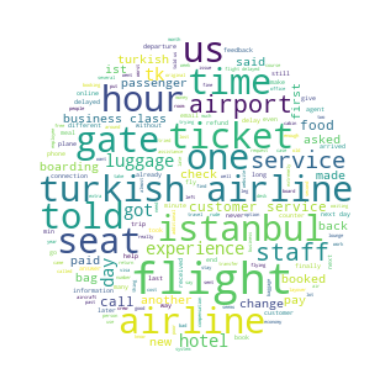

In [56]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# this actually generates the word cloud
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(Turkish_clean)

# and this displays it
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

Sentiment Analysis